In [36]:
import urllib.request
import pandas as pd

Fetch data 

In [37]:
for subject in range(1, 17):
    for run in range(1, 4):
        urllib.request.urlretrieve('https://openneuro.org/crn/datasets/ds000005/snapshots/00001/files/sub-{:02d}:func:sub-{:02d}_task-mixedgamblestask_run-{:02d}_events.tsv'.format(subject, subject, run), 'data/sub{}run{}.tsv'.format(subject, run))

Combine all data

In [26]:
allDataFrames = []
for subject in range(1, 17):
    for run in range(1, 4):
        df = pd.read_csv('data/sub{}run{}.tsv'.format(subject, run), sep='\t')
        df['subj_idx'] = subject
        allDataFrames.append(df)

allParticipantsDataCombined = pd.concat(allDataFrames)
print(len(allParticipantsDataCombined))

4096


In [27]:
allParticipantsDataCombined.head()

,onset,duration,parametric loss,distance from indifference,parametric gain,gain,loss,PTval,respnum,respcat,response_time,subj_idx
0,0.0,3,0.1273,-0.0814,-0.139,20,15,5.15,0,-1,0.000,1
1,4.0,3,-0.0227,-0.4147,-0.189,18,12,6.12,2,1,1.793,1
2,8.0,3,0.1273,0.2519,-0.389,10,15,-4.85,3,0,1.637,1
3,18.0,3,0.1773,-0.0814,0.211,34,16,18.16,1,1,1.316,1
4,24.0,3,-0.3727,-0.0814,-0.189,18,5,13.05,1,1,1.670,1


In [30]:
# remove trials where RT less than 200 ms
dataNonZeroRT = allParticipantsDataCombined[allParticipantsDataCombined['response_time'] > 0.2]
print(len(dataNonZeroRT))

3909


In [31]:
# multiply losses by -1
dataNonZeroRT['loss'] = dataNonZeroRT['loss'] * -1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
# rename columns
dataNonZeroRT.rename(columns = {'response_time':'rt', 'respcat': 'response'}, inplace = True) 

# select required columns
finalData = dataNonZeroRT[["subj_idx", "response", "rt", 'gain', 'loss']]
finalData.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,subj_idx,response,rt,gain,loss
1,1,1,1.793,18,-12
2,1,0,1.637,10,-15
3,1,1,1.316,34,-16
4,1,1,1.670,18,-5
5,1,1,1.232,26,-13


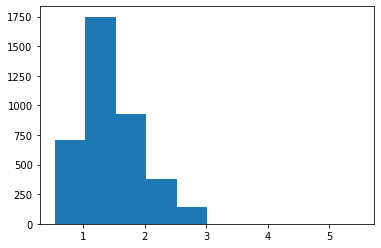

In [34]:
from matplotlib import pyplot as plt
plt.hist(finalData['rt'].to_list())
plt.show()

In [35]:
finalData.to_csv("data.csv")